In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
nifty = pd.read_csv('../historical/NIFTY50_day.csv', parse_dates=['Date'], date_parser=dateparse)
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
vix = pd.read_csv('../historical/VIX_day.csv', parse_dates=['Date'], date_parser=dateparse)
dateparse = lambda x: datetime.strptime(x, '%m-%d-%Y')
expiries  = pd.read_csv('../historical/expiry_days_15Jan2015_12May2021.csv', parse_dates=['expDays'], date_parser=dateparse)

In [3]:
tmpNifty = nifty[nifty.Date.isin(expiries.expDays.values)]\
                    .drop_duplicates()\
                    .reset_index(drop=True)\
                    .loc[:,['Open', 'High', 'Low', 'Close']].add_prefix('nifty_')

In [4]:
tmpVix = vix[vix.Date.isin(expiries.expDays.values)]\
                    .drop_duplicates()\
                    .reset_index(drop=True)\
                    .loc[:,['Open', 'High', 'Low', 'Close']].add_prefix('vix_')

In [5]:
df = pd.concat([expiries, tmpNifty, tmpVix], axis=1)

(0.0, 250.0)

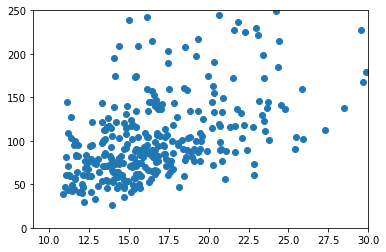

In [6]:
plt.scatter(df.iloc[:,5:].median(axis=1), df.nifty_High - df.nifty_Low)
plt.xlim([9, 30])
plt.ylim([0, 250])

In [7]:
np.percentile(df.nifty_High - df.nifty_Low, [50, 75, 85])

array([ 94.35  , 134.2875, 160.07  ])

In [8]:
np.percentile(df.nifty_High - df.nifty_Open, [50, 75, 85])

array([35.85 , 66.025, 91.175])

In [9]:
np.percentile(df.nifty_Open - df.nifty_Low, [50, 75, 85])

array([ 50.95  ,  85.4625, 109.9775])

#### Overall, Nifty can make 160 points move throughout the day. From Opening, it can rise or fall 100 points on either side.